

<center>
<h1> MACHINE LEARNING PROJECT </h1>
    <h2> HOUSE PRICE PREDICTION </h2>
</center>
<br>



### In this Project we will predict the housing prices ....

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

In [2]:
pip install scikit-learn scipy seaborn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn in c:\users\anasa\anaconda3\lib\site-packages (1.2.2)



### DATA EXPLORATION

In [2]:
data = pd.read_csv('housing.csv')

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# Removing the null values...

data.dropna(inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [11]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'],axis=1)
y = data['median_house_value']

In [12]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
train_data = X_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

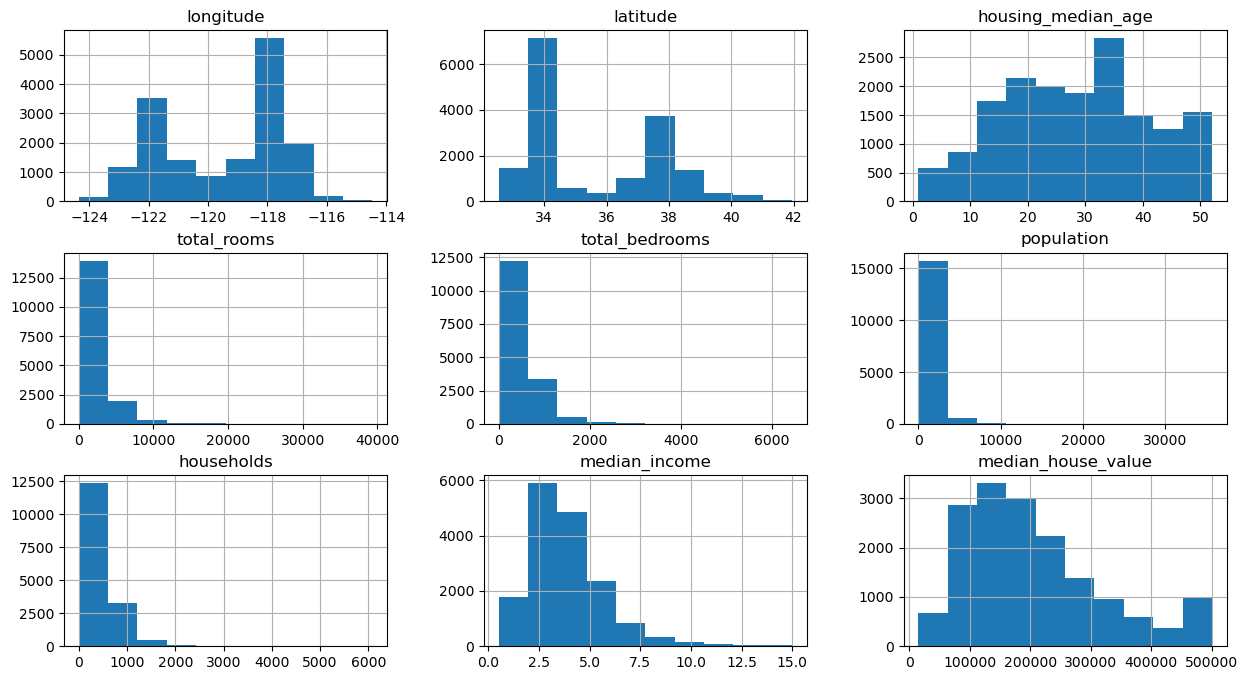

In [14]:
# Here is the distribution the various features 
train_data.hist(figsize=(15,8))

C:\Users\AnasA\AppData\Local\Temp\ipykernel_14780\4030865306.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')


<Axes: >

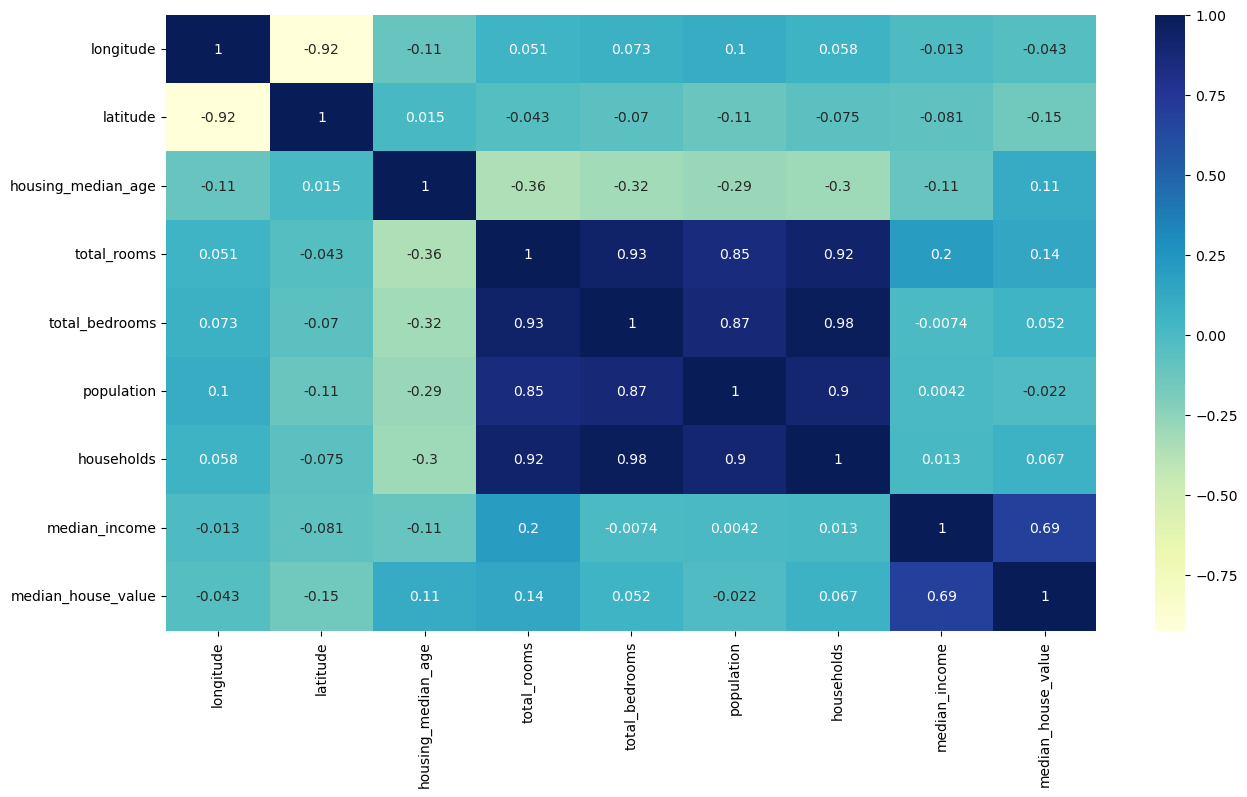

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

### DATA PRE-PROCESSING

In [16]:
# We are using the logarithim to check the hist of bedrooms and all.

train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

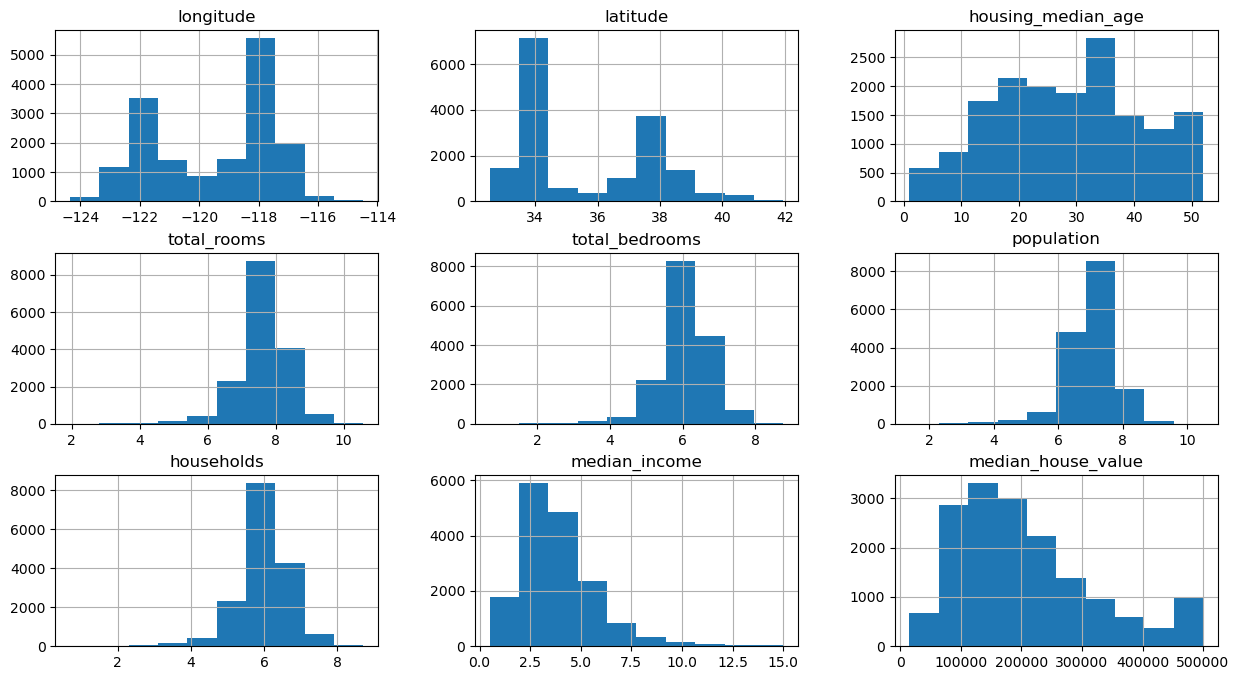

In [17]:
train_data.hist(figsize=(15,8))

My Prediction
#### near ocean - high price
#### near land - low price

In [ ]:
# IMPORTANT ------
# We have to covert the ocean_proximity into a binary features either 0 or 1.

In [18]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
997,-121.80,37.70,22.0,8.618666,6.850126,7.813996,6.814543,4.7361,INLAND,216800.0
1608,-122.06,37.85,17.0,8.919453,7.350516,7.646354,7.279319,3.6437,NEAR BAY,186500.0
15598,-116.35,32.74,16.0,7.861727,6.408529,6.953684,5.908083,1.7137,INLAND,110700.0
11099,-117.88,33.82,17.0,7.717796,6.559615,7.232010,6.428105,3.8631,<1H OCEAN,225000.0
18676,-121.90,36.93,22.0,8.893161,7.118016,7.522941,6.725034,5.3276,NEAR OCEAN,335500.0
...,...,...,...,...,...,...,...,...,...,...
5624,-118.27,33.77,26.0,7.728856,6.543912,7.850883,6.390241,1.9964,NEAR OCEAN,150600.0
9488,-123.36,39.25,17.0,6.992096,5.541264,6.259581,5.313206,2.5875,<1H OCEAN,144500.0
2816,-119.02,35.41,21.0,7.837949,6.318968,7.168580,6.249975,2.0575,INLAND,67000.0
9474,-123.32,39.42,22.0,7.643004,6.070738,7.033506,5.998937,2.3906,<1H OCEAN,92600.0


In [19]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7242
INLAND        5163
NEAR OCEAN    2123
NEAR BAY      1814
ISLAND           4
Name: ocean_proximity, dtype: int64

In [20]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [21]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
997,-121.80,37.70,22.0,8.618666,6.850126,7.813996,6.814543,4.7361,216800.0,0,1,0,0,0
1608,-122.06,37.85,17.0,8.919453,7.350516,7.646354,7.279319,3.6437,186500.0,0,0,0,1,0
15598,-116.35,32.74,16.0,7.861727,6.408529,6.953684,5.908083,1.7137,110700.0,0,1,0,0,0
11099,-117.88,33.82,17.0,7.717796,6.559615,7.232010,6.428105,3.8631,225000.0,1,0,0,0,0
18676,-121.90,36.93,22.0,8.893161,7.118016,7.522941,6.725034,5.3276,335500.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5624,-118.27,33.77,26.0,7.728856,6.543912,7.850883,6.390241,1.9964,150600.0,0,0,0,0,1
9488,-123.36,39.25,17.0,6.992096,5.541264,6.259581,5.313206,2.5875,144500.0,1,0,0,0,0
2816,-119.02,35.41,21.0,7.837949,6.318968,7.168580,6.249975,2.0575,67000.0,0,1,0,0,0
9474,-123.32,39.42,22.0,7.643004,6.070738,7.033506,5.998937,2.3906,92600.0,1,0,0,0,0


<Axes: >

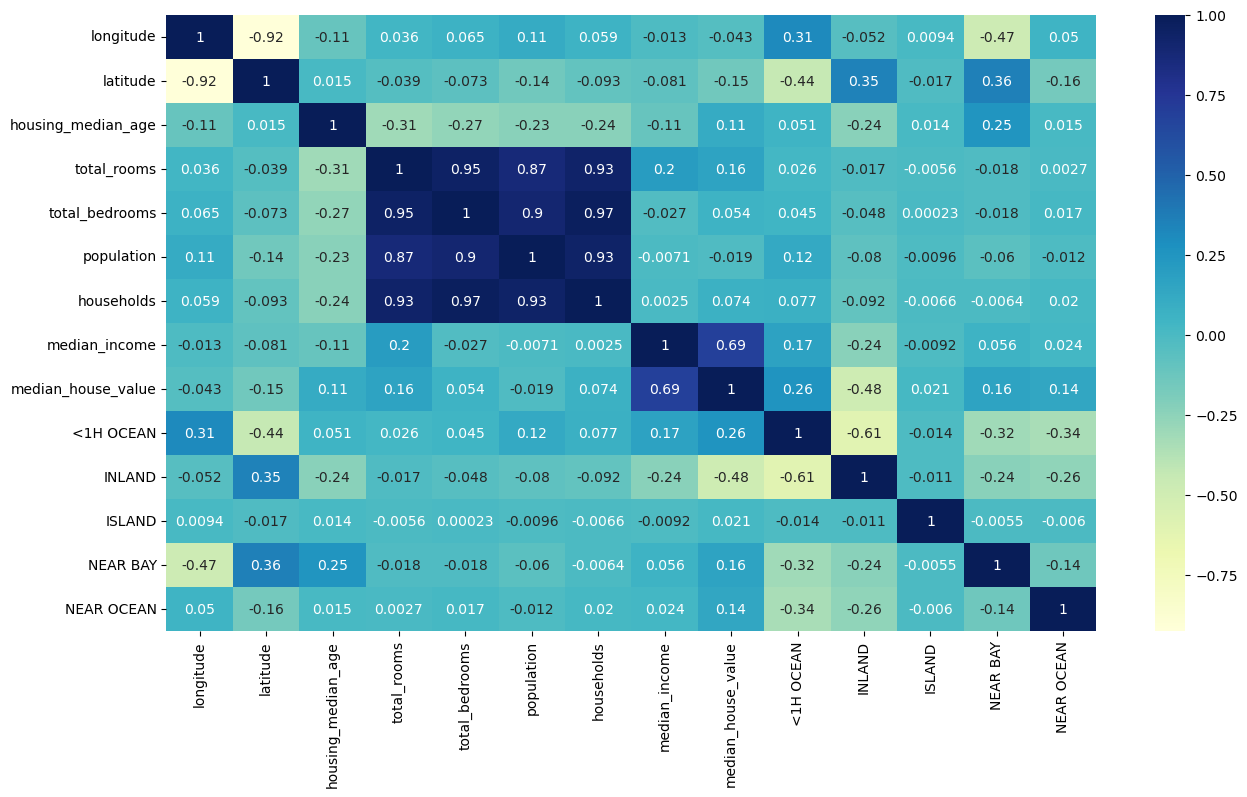

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

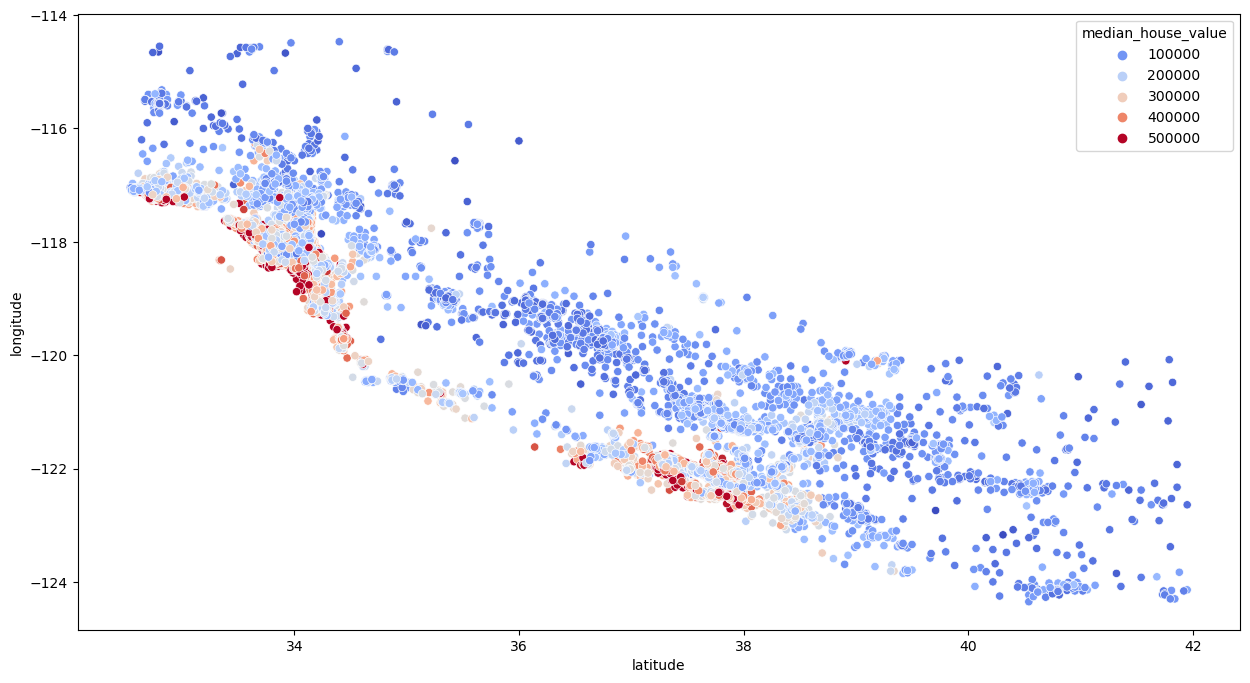

In [31]:
# Feature engineering values...

plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

In [38]:
# How many total rooms are there in total bedrooms?

train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms'] # bedrooms / rooms
train_data['household_ratio'] = train_data['total_rooms'] / train_data['households'] # rooms / households

<Axes: >

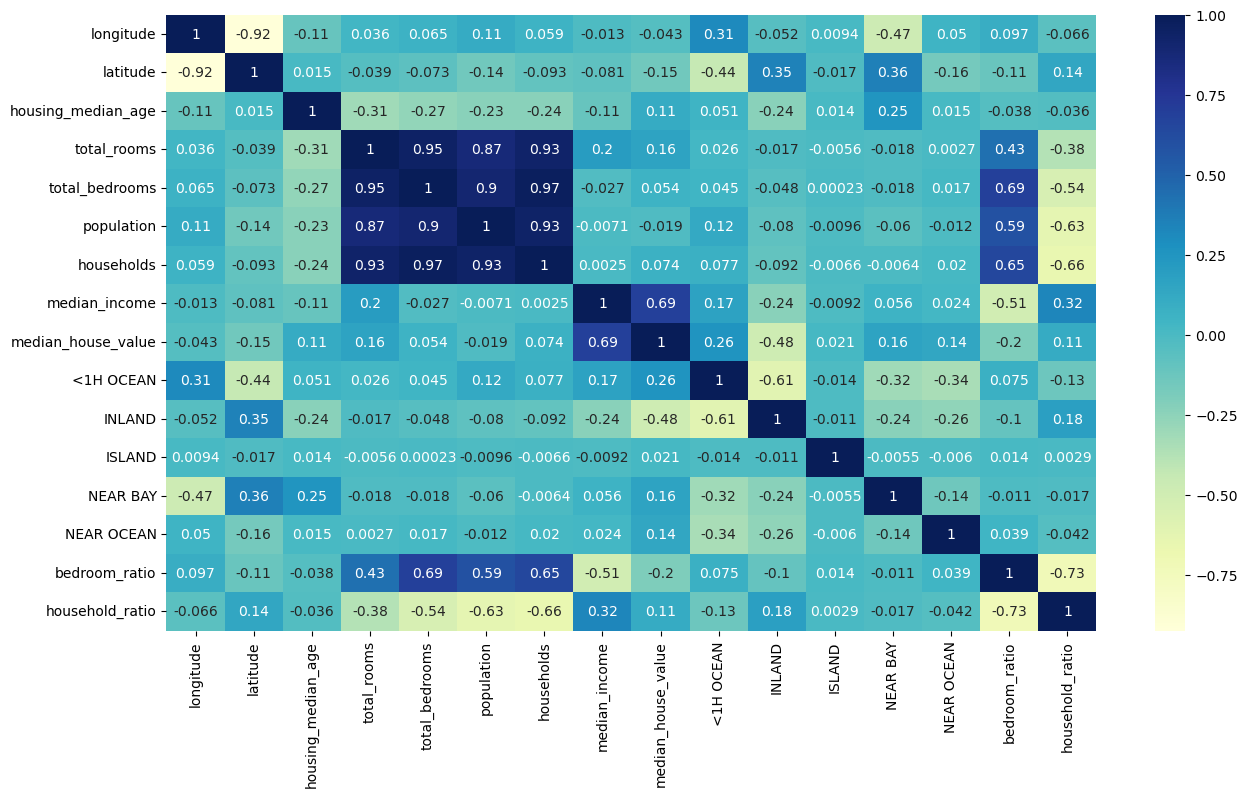

In [39]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

<h4> Linear Regression Model </h4>
<p>Now we want to train the multiple models with Simple Linear Regression Model.</p>
<p>Last we saw that we were making the TRAINING MODEL,
    now like-wise we have to it for the TESTING MODEL</p>

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s, y_train) 

LinearRegression()

In [60]:
# Here we are now testing the model

test_data = x_test.join(y_test)

# We are using the logarithim to check the hist of bedrooms and all.

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

# How many total rooms are there in total bedrooms?

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms'] # bedrooms / rooms
test_data['household_ratio'] = test_data['total_rooms'] / test_data['households'] # rooms / households

In [63]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [71]:
X_test_s = scaler.transform(x_test)

In [74]:
# reg.score(x_test, y_test) without StandardScaler
reg.score(X_test_s, y_test)

0.6707468435937889

<h4>Random Forest Model</h4> 

<p>HyperParameter Tuning</p> 

In [100]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [102]:
forest.score(X_test_s, y_test)

0.8196611167602827

In [118]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators" : [100,200,300],
    "min_samples_split" : [2,4],
    "max_depth" : [None,4,8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                          scoring="neg_mean_squared_error",
                          return_train_score=True
                          )

grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [119]:
grid_search.best_estimator_

RandomForestRegressor(n_estimators=300)

In [120]:
grid_search.best_estimator_.score(X_test_s,y_test)

0.82067675277655

In [113]:
best_forest = grid_search.best_estimator_

In [115]:
best_forest.score(X_test_s, y_test)

0.819233113927602

In [ ]:
import pandas as pd

# Create a dataframe
data = {'Category': ['A', 'B', 'A', 'B'],
        'Subcategory': ['X', 'Y', 'X', 'Y'],
        'Value': [10, 20, 30, 40]}
df = pd.DataFrame(data)

# Create a pivot table
pivot_table = df.pivot_table(values='Value', index='Category', columns='Subcategory', aggfunc='sum')

## So In the end I developed Machine Learning house prediction prices, 
## and we get to know that its going into negative direction as it needs some improvments in the prices.....

<center>
    <b>
    <h1>THE END</h1>
    </b>
</center>